
### **[Task 3]** Write down your answers, experiment steps, settings, results and conclusions to the report. <br>
 * How many images in new dataset are labelled for training, validation and testing respectively?
 * What is the original image size (H x W)?
 * What is the number of classes (nc) in your best.pt model?
 * Finetune the model by adjusting epochs, learning rate, batch size, background images, etc.
 * What is your model’s highest mAP50 and mAP50-95 on test set?
 * Test model, select a detection image from ‘runs/detect/prediction#’ folder and add it to your report as a detection sample.

## 5)	Deploy model for live detection, tracking and counting on webcam.
* Develop a for-loop python script to process video streaming <br>
Refer to: https://docs.ultralytics.com/modes/predict/#streaming-source-for-loop

* Use openCV to capture live video from webcam: <br>
cap = cv2.VideoCapture(0)

* Use YOLOv8 tracking commands <br>
Refer to: https://docs.ultralytics.com/modes/track/

* For tracking object: <br>
results = model.track(source=0, conf=0.3, iou=0.5, show=True)

* For tracking object with custom tracker: <br>
results = model.track(source=0, tracker='custom_tracker.yaml')

* Count objects using detection boxes and classes extracted from the result of model.track().

* Visualize and add object tracking and counting information to webcam live video with OpenCV method: <br>
cv2.putText()

In [ ]:
# tracking: Streaming for-loop
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import cv2
from ultralytics import YOLO

num_classes = 2

# Load the YOLOv8 model
model = YOLO('C:\\Users\\Calvin\\CVTask4\\best.pt')

# Open the video file
# video_path = "path/to/your/video/file.mp4"

# webcam
video_path = 0
cap = cv2.VideoCapture(video_path)

# Check if the webcam is opened successfully
if not cap.isOpened():
    print("Error: Could not open video source.")
    exit()

# Loop through the video frames
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()

    if success:
        # Run YOLOv8 inference on the frame
        #results = model(frame)
        results = model.track(frame, persist=True, conf=0.3, iou=0.5)

        boxes = results[0].boxes
        names = results[0].names
        #print('results= ', results)
        #print('boxes= ',boxes)

        count_text = ''
        count_class = []
        for i in range(len(names)):
            count_class.append(0)

        cls = boxes.cls
        #print('cls= ',cls)
        for c in cls:
            i = int(c)
            #print('name= ', name)
            count_class[i] = count_class[i] + 1

        for i in range(len(names)):
            name= names[i]
            count_text = count_text + name + ": " + str(count_class[i]) + " "

        # Visualize the results on the frame
        annotated_frame = results[0].plot()

        #
        # plot count of objects on the frame
        #

        # font
        font = cv2.FONT_HERSHEY_SIMPLEX

        # org
        org = (20, 30)

        # fontScale
        fontScale = 1

        # Blue color in BGR
        color = (255, 0, 0)

        # Line thickness of 2 px
        thickness = 2

        # Using cv2.putText() method
        annotated_frame = cv2.putText(annotated_frame, count_text, org, font,
                           fontScale, color, thickness, cv2.LINE_AA)

        # Display the annotated frame
        cv2.imshow("myDetection", annotated_frame)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        # Break the loop if the end of the video is reached
        break

# Release the video capture object and close the display window
cap.release()
cv2.destroyAllWindows()


0: 480x640 (no detections), 234.9ms
Speed: 5.0ms preprocess, 234.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 227.9ms
Speed: 22.0ms preprocess, 227.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 203.9ms
Speed: 9.0ms preprocess, 203.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 200.9ms
Speed: 5.0ms preprocess, 200.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 214.9ms
Speed: 5.0ms preprocess, 214.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 218.9ms
Speed: 6.0ms preprocess, 218.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 204.9ms
Speed: 6.0ms preprocess, 204.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 203.9ms
Speed: 5.0ms prep


0: 480x640 1 elastic band, 191.9ms
Speed: 5.0ms preprocess, 191.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 290.9ms
Speed: 8.0ms preprocess, 290.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 182.9ms
Speed: 8.0ms preprocess, 182.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 elastic bands, 183.9ms
Speed: 6.0ms preprocess, 183.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 elastic bands, 180.9ms
Speed: 7.0ms preprocess, 180.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 elastic bands, 185.9ms
Speed: 6.0ms preprocess, 185.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 elastic bands, 185.9ms
Speed: 7.0ms preprocess, 185.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 elastic bands, 181.9ms
Speed: 7.0ms preproce


0: 480x640 1 elastic band, 187.9ms
Speed: 9.0ms preprocess, 187.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 elastic bands, 184.9ms
Speed: 5.0ms preprocess, 184.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 elastic bands, 185.9ms
Speed: 8.0ms preprocess, 185.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 181.9ms
Speed: 5.0ms preprocess, 181.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 183.9ms
Speed: 6.0ms preprocess, 183.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 190.9ms
Speed: 10.0ms preprocess, 190.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 elastic bands, 196.9ms
Speed: 6.0ms preprocess, 196.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 1 eye drop, 186.9ms
Speed: 7.0


0: 480x640 3 elastic bands, 1 eye drop, 212.9ms
Speed: 6.0ms preprocess, 212.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 3 elastic bands, 2 eye drops, 179.9ms
Speed: 5.0ms preprocess, 179.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 3 elastic bands, 2 eye drops, 198.9ms
Speed: 5.0ms preprocess, 198.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 3 elastic bands, 2 eye drops, 224.9ms
Speed: 5.0ms preprocess, 224.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 elastic bands, 3 eye drops, 212.9ms
Speed: 5.0ms preprocess, 212.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 3 elastic bands, 3 eye drops, 194.9ms
Speed: 6.0ms preprocess, 194.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 elastic bands, 3 eye drops, 214.9ms
Speed: 8.0ms preprocess, 214.9ms inference, 2.0ms postprocess p


0: 480x640 2 elastic bands, 3 eye drops, 191.9ms
Speed: 7.0ms preprocess, 191.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 elastic bands, 3 eye drops, 184.9ms
Speed: 4.0ms preprocess, 184.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 3 elastic bands, 2 eye drops, 189.9ms
Speed: 4.0ms preprocess, 189.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 3 elastic bands, 2 eye drops, 184.9ms
Speed: 5.0ms preprocess, 184.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 3 elastic bands, 2 eye drops, 204.9ms
Speed: 5.0ms preprocess, 204.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 3 elastic bands, 2 eye drops, 217.9ms
Speed: 5.0ms preprocess, 217.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 3 elastic bands, 2 eye drops, 211.9ms
Speed: 7.0ms preprocess, 211.9ms inference, 2.0ms postprocess 

Speed: 7.0ms preprocess, 325.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 3 elastic bands, 3 eye drops, 385.9ms
Speed: 10.0ms preprocess, 385.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 3 elastic bands, 3 eye drops, 327.9ms
Speed: 13.0ms preprocess, 327.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 3 elastic bands, 3 eye drops, 278.9ms
Speed: 6.0ms preprocess, 278.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 3 elastic bands, 2 eye drops, 313.9ms
Speed: 5.0ms preprocess, 313.9ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 3 elastic bands, 2 eye drops, 355.9ms
Speed: 8.0ms preprocess, 355.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 3 elastic bands, 1 eye drop, 278.9ms
Speed: 7.0ms preprocess, 278.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 3


0: 480x640 3 elastic bands, 2 eye drops, 205.9ms
Speed: 6.0ms preprocess, 205.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 3 elastic bands, 2 eye drops, 238.9ms
Speed: 7.0ms preprocess, 238.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 3 elastic bands, 3 eye drops, 241.9ms
Speed: 7.0ms preprocess, 241.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 3 elastic bands, 2 eye drops, 282.9ms
Speed: 6.0ms preprocess, 282.9ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 3 elastic bands, 2 eye drops, 252.9ms
Speed: 7.0ms preprocess, 252.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 3 elastic bands, 2 eye drops, 269.9ms
Speed: 6.0ms preprocess, 269.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 elastic bands, 2 eye drops, 281.9ms
Speed: 7.0ms preprocess, 281.9ms inference, 2.0ms postprocess 

Speed: 9.0ms preprocess, 206.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 3 elastic bands, 2 eye drops, 223.9ms
Speed: 9.0ms preprocess, 223.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 3 elastic bands, 2 eye drops, 217.9ms
Speed: 6.0ms preprocess, 217.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 3 elastic bands, 3 eye drops, 312.9ms
Speed: 5.0ms preprocess, 312.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 3 elastic bands, 3 eye drops, 292.9ms
Speed: 8.0ms preprocess, 292.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 3 elastic bands, 3 eye drops, 302.9ms
Speed: 11.0ms preprocess, 302.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 3 elastic bands, 2 eye drops, 325.9ms
Speed: 6.0ms preprocess, 325.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 3


0: 480x640 3 elastic bands, 3 eye drops, 506.8ms
Speed: 12.0ms preprocess, 506.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 3 elastic bands, 3 eye drops, 418.9ms
Speed: 10.0ms preprocess, 418.9ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 3 elastic bands, 3 eye drops, 584.8ms
Speed: 22.0ms preprocess, 584.8ms inference, 4.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 3 elastic bands, 3 eye drops, 259.9ms
Speed: 7.0ms preprocess, 259.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 3 elastic bands, 3 eye drops, 257.9ms
Speed: 9.0ms preprocess, 257.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 3 elastic bands, 3 eye drops, 224.9ms
Speed: 7.0ms preprocess, 224.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 3 elastic bands, 3 eye drops, 257.9ms
Speed: 9.0ms preprocess, 257.9ms inference, 3.0ms postproce


0: 480x640 3 elastic bands, 2 eye drops, 198.9ms
Speed: 7.0ms preprocess, 198.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 3 elastic bands, 2 eye drops, 221.9ms
Speed: 5.0ms preprocess, 221.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 3 elastic bands, 2 eye drops, 372.9ms
Speed: 24.0ms preprocess, 372.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 3 elastic bands, 2 eye drops, 191.9ms
Speed: 6.0ms preprocess, 191.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 3 elastic bands, 2 eye drops, 190.9ms
Speed: 4.0ms preprocess, 190.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 3 elastic bands, 2 eye drops, 205.9ms
Speed: 5.0ms preprocess, 205.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 3 elastic bands, 2 eye drops, 202.9ms
Speed: 9.0ms preprocess, 202.9ms inference, 2.0ms postprocess

Speed: 6.0ms preprocess, 212.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 3 elastic bands, 2 eye drops, 224.9ms
Speed: 8.0ms preprocess, 224.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 3 elastic bands, 2 eye drops, 197.9ms
Speed: 4.0ms preprocess, 197.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 elastic bands, 1 eye drop, 195.9ms
Speed: 5.0ms preprocess, 195.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 238.9ms
Speed: 7.0ms preprocess, 238.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 eye drop, 214.9ms
Speed: 14.0ms preprocess, 214.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 206.9ms
Speed: 7.0ms preprocess, 206.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 192.9ms
Speed: 7.0ms preproces


0: 480x640 (no detections), 180.9ms
Speed: 5.0ms preprocess, 180.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 170.9ms
Speed: 7.0ms preprocess, 170.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 181.9ms
Speed: 6.0ms preprocess, 181.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 182.9ms
Speed: 6.0ms preprocess, 182.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 177.9ms
Speed: 6.0ms preprocess, 177.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 195.9ms
Speed: 7.0ms preprocess, 195.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 155.9ms
Speed: 6.0ms preprocess, 155.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 176.9ms
Speed: 6.0ms prepro


0: 480x640 (no detections), 202.9ms
Speed: 13.0ms preprocess, 202.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 197.9ms
Speed: 5.0ms preprocess, 197.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 172.9ms
Speed: 7.0ms preprocess, 172.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 167.0ms
Speed: 5.0ms preprocess, 167.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 168.9ms
Speed: 6.0ms preprocess, 168.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 165.9ms
Speed: 5.0ms preprocess, 165.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 170.9ms
Speed: 5.0ms preprocess, 170.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 163.9ms
Speed: 5.0ms preproc

- Snapshot of above display

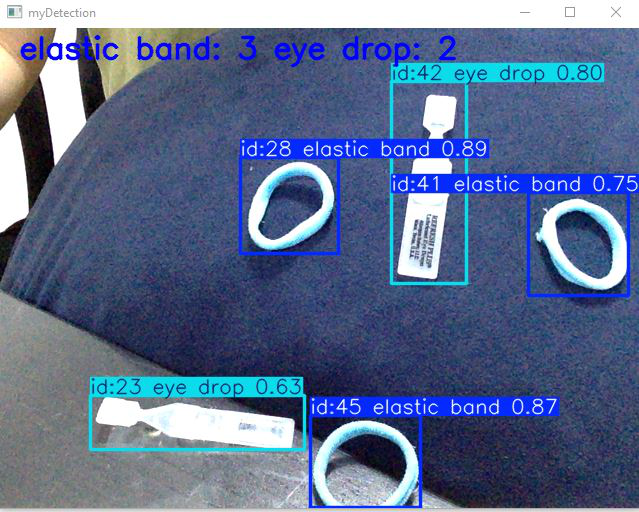

In [ ]:
from IPython.display import display
from PIL import Image

# Load and display the image inline
image_path = "C:\\Users\\Pauline\\CVPA2\\Snapshot.jpg"
image = Image.open(image_path)
display(image)


•	Track objects with 2 different trackers (botsort and bytetrack) supported by YOLOv8, compare object tracking performance on webcam live video, write the comparison result into your experiment summary.

In [ ]:
# tracking: Streaming for-loop
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

import cv2
from ultralytics import YOLO
import time
import numpy as np

num_classes = 2

# Load the YOLOv8 model
model = YOLO('C:\\Users\\Calvin\\CVTask4\\best.pt')

# Trackers to evaluate
trackers = ['botsort', 'bytetrack']
summary = {}

# Open the webcam
video_path = 0
cap = cv2.VideoCapture(video_path)

# Check if the webcam is opened successfully
if not cap.isOpened():
    print("Error: Could not open video source.")
    exit()

# Initialize frame counter and summary for each tracker
frame_count = 0
total_processing_time = {tracker: 0 for tracker in trackers}

# Loop through video frames
while cap.isOpened():
    # Read a frame from the webcam
    success, frame = cap.read()

    if success:
        annotated_frames = []
        combined_text = ""
        frame_count += 1

        # Process the frame with each tracker
        for tracker_name in trackers:
            model.tracker = tracker_name

            # Measure time for inference
            start_time = time.time()
            results = model.track(frame, persist=True, conf=0.3, iou=0.5)
            end_time = time.time()
            processing_time = end_time - start_time
            total_processing_time[tracker_name] += processing_time

            # Get boxes and names
            boxes = results[0].boxes
            names = results[0].names

            # Count objects for this tracker
            count_class = [0] * len(names)
            for c in boxes.cls:
                count_class[int(c)] += 1

            # Prepare count text
            count_text = f"[{tracker_name.upper()}] " + ' '.join(
                [f"{names[i]}: {count_class[i]}" for i in range(len(names))])

            # Annotate the frame for this tracker
            annotated_frame = results[0].plot()
            font = cv2.FONT_HERSHEY_SIMPLEX
            org = (20, 30)
            fontScale = 1
            color = (255, 0, 0)
            thickness = 2
            annotated_frame = cv2.putText(annotated_frame, count_text, org, font,
                                          fontScale, color, thickness, cv2.LINE_AA)
            annotated_frames.append(annotated_frame)
            combined_text += count_text + " | "

        # Combine frames side-by-side
        h1, w1, _ = annotated_frames[0].shape
        h2, w2, _ = annotated_frames[1].shape

        if h1 != h2:
            max_h = max(h1, h2)
            annotated_frames[0] = cv2.resize(annotated_frames[0], (int(w1 * max_h / h1), max_h))
            annotated_frames[1] = cv2.resize(annotated_frames[1], (int(w2 * max_h / h2), max_h))

        combined_frame = np.hstack(annotated_frames)

        # Display the combined frame
        cv2.imshow("BOT-SORT (Left) vs ByteTrack (Right)", combined_frame)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        # Break the loop if the end of the video is reached
        break

# Cleanup
cap.release()
cv2.destroyAllWindows()

# Calculate and print performance metrics
print("\nExperiment Summary:")
for tracker_name in trackers:
    avg_processing_time = total_processing_time[tracker_name] / frame_count if frame_count > 0 else 0
    print(f"Tracker: {tracker_name}")
    print(f"  Total Frames Processed: {frame_count}")
    print(f"  Avg Processing Time per Frame: {avg_processing_time:.4f} seconds")

In [ ]:
# tracking: Streaming for-loop
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

import cv2
from ultralytics import YOLO
import time

num_classes = 3

# Load the YOLOv8 model
model = YOLO('C:\\Users\\Calvin\\CVTask4\\best.pt')

# Trackers to evaluate
trackers = ['botsort', 'bytetrack']
summary = {}

# Open the video file
# video_path = "path/to/your/video/file.mp4"

# Webcam
video_path = 0
cap = cv2.VideoCapture(video_path)

# Check if the webcam is opened successfully
if not cap.isOpened():
    print("Error: Could not open video source.")
    exit()

# Loop through the trackers for comparison
for tracker_name in trackers:
    print(f"Evaluating tracker: {tracker_name}")
    model.tracker = tracker_name
    frame_count = 0
    total_processing_time = 0

    while cap.isOpened():
        # Read a frame from the video
        success, frame = cap.read()

        if success:
            # Measure time for inference
            start_time = time.time()
            results = model.track(frame, persist=True, conf=0.3, iou=0.5)
            end_time = time.time()
            processing_time = end_time - start_time

            # Update metrics
            frame_count += 1
            total_processing_time += processing_time

            boxes = results[0].boxes
            names = results[0].names

            count_text = ''
            count_class = []
            for i in range(len(names)):
                count_class.append(0)

            cls = boxes.cls
            for c in cls:
                i = int(c)
                count_class[i] += 1

            for i in range(len(names)):
                name = names[i]
                count_text = count_text + name + ": " + str(count_class[i]) + " "

            # Visualize the results on the frame
            annotated_frame = results[0].plot()

            # Plot count of objects on the frame
            font = cv2.FONT_HERSHEY_SIMPLEX
            org = (20, 30)
            fontScale = 1
            color = (255, 0, 0)
            thickness = 2

            annotated_frame = cv2.putText(annotated_frame, count_text, org, font,
                                          fontScale, color, thickness, cv2.LINE_AA)

            # Display the annotated frame
            cv2.imshow("myDetection", annotated_frame)

            # Break the loop if 'q' is pressed
            if cv2.waitKey(1) & 0xFF == ord("q"):
                break
        else:
            # Break the loop if the end of the video is reached
            break

    # Record performance metrics for the current tracker
    avg_processing_time = total_processing_time / frame_count if frame_count > 0 else 0
    summary[tracker_name] = {
        "total_frames": frame_count,
        "avg_processing_time_per_frame": avg_processing_time
    }
    print(f"Tracker {tracker_name} completed. Average processing time per frame: {avg_processing_time:.4f} seconds.")

    # Reset video capture for the next tracker
    cap.set(cv2.CAP_PROP_POS_FRAMES, 0)

# Cleanup
cap.release()
cv2.destroyAllWindows()

# Print the experiment summary
print("\nExperiment Summary:")
for tracker, metrics in summary.items():
    print(f"Tracker: {tracker}")
    print(f"  Total Frames Processed: {metrics['total_frames']}")
    print(f"  Avg Processing Time per Frame: {metrics['avg_processing_time_per_frame']:.4f} seconds")

Evaluating tracker: botsort

0: 480x640 (no detections), 199.9ms
Speed: 8.0ms preprocess, 199.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 195.9ms
Speed: 5.0ms preprocess, 195.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 177.9ms
Speed: 12.0ms preprocess, 177.9ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 174.9ms
Speed: 4.0ms preprocess, 174.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 174.9ms
Speed: 5.0ms preprocess, 174.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 170.9ms
Speed: 5.0ms preprocess, 170.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 180.9ms
Speed: 4.0ms preprocess, 180.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections)


0: 480x640 (no detections), 187.9ms
Speed: 5.0ms preprocess, 187.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 172.9ms
Speed: 4.0ms preprocess, 172.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 170.9ms
Speed: 4.0ms preprocess, 170.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 254.9ms
Speed: 5.0ms preprocess, 254.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 172.9ms
Speed: 5.0ms preprocess, 172.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 175.9ms
Speed: 4.0ms preprocess, 175.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 160.9ms
Speed: 6.0ms preprocess, 160.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 164.9ms
Speed: 5.0ms preproc

In [ ]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

import cv2
from ultralytics import YOLO
import time
from threading import Thread

num_classes = 3

# Load the YOLOv8 model
model = YOLO('C:\\Users\\Calvin\\CVTask4\\best.pt')

# Trackers to evaluate
trackers = ['botsort', 'bytetrack']
summary = {}

# Open the video file (Webcam feed)
video_path = 0
cap = cv2.VideoCapture(video_path)

# Check if the webcam is opened successfully
if not cap.isOpened():
    print("Error: Could not open video source.")
    exit()

# Set max frames limit
max_frames = 500

# Function to run a tracker
def run_tracker(tracker_name):
    print(f"Evaluating tracker: {tracker_name}")
    model.tracker = tracker_name
    frame_count = 0
    total_processing_time = 0
    cap.set(cv2.CAP_PROP_POS_FRAMES, 0)  # Reset video to the start

    while cap.isOpened() and frame_count < max_frames:
        # Read a frame from the video
        success, frame = cap.read()

        if success:
            # Measure time for inference
            start_time = time.time()
            results = model.track(frame, persist=True, conf=0.3, iou=0.5)
            end_time = time.time()
            processing_time = end_time - start_time

            # Update metrics
            frame_count += 1
            total_processing_time += processing_time

            boxes = results[0].boxes
            names = results[0].names

            count_text = ''
            count_class = [0] * len(names)

            cls = boxes.cls
            for c in cls:
                i = int(c)
                count_class[i] += 1

            for i in range(len(names)):
                name = names[i]
                count_text += f"{name}: {count_class[i]} "

            # Visualize the results on the frame
            annotated_frame = results[0].plot()

            # Plot count of objects on the frame
            font = cv2.FONT_HERSHEY_SIMPLEX
            org = (20, 30)
            fontScale = 1
            color = (255, 0, 0)
            thickness = 2

            annotated_frame = cv2.putText(annotated_frame, count_text, org, font,
                                          fontScale, color, thickness, cv2.LINE_AA)

            # Display the annotated frame
            cv2.imshow("myDetection", annotated_frame)

            # Break the loop if 'q' is pressed
            if cv2.waitKey(1) & 0xFF == ord("q"):
                break

        else:
            # Break the loop if the end of the video is reached
            break

    # Record performance metrics for the current tracker
    avg_processing_time = total_processing_time / frame_count if frame_count > 0 else 0
    summary[tracker_name] = {
        "total_frames": frame_count,
        "avg_processing_time_per_frame": avg_processing_time
    }
    print(f"Tracker {tracker_name} completed. Average processing time per frame: {avg_processing_time:.4f} seconds.")

# Create threads for each tracker
threads = []
for tracker_name in trackers:
    thread = Thread(target=run_tracker, args=(tracker_name,))
    threads.append(thread)
    thread.start()

# Wait for all threads to finish
for thread in threads:
    thread.join()

# Cleanup
cap.release()
cv2.destroyAllWindows()

# Print the experiment summary
print("\nExperiment Summary:")
for tracker, metrics in summary.items():
    print(f"Tracker: {tracker}")
    print(f"  Total Frames Processed: {metrics['total_frames']}")
    print(f"  Avg Processing Time per Frame: {metrics['avg_processing_time_per_frame']:.4f} seconds")


Evaluating tracker: botsortEvaluating tracker: bytetrack


Ultralytics 8.3.47  Python-3.9.12 torch-2.5.1+cpu CPU (Intel Core(TM) i5-4260U 1.40GHz)

Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
0: 480x640 (no detections), 363.9ms
Speed: 9.0ms preprocess, 363.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 346.9ms
Speed: 10.0ms preprocess, 346.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 225.9ms
Speed: 6.0ms preprocess, 225.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 206.9ms
Speed: 7.0ms preprocess, 206.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 288.9ms
Speed: 4.0ms preprocess, 288.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 259.9ms
Speed: 20.0ms preprocess, 259.9ms inference, 1.0ms postproc


0: 480x640 (no detections), 180.9ms
Speed: 6.0ms preprocess, 180.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 eye drop, 206.9ms
Speed: 5.0ms preprocess, 206.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 181.9ms
Speed: 5.0ms preprocess, 181.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 176.9ms
Speed: 5.0ms preprocess, 176.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 178.9ms
Speed: 7.0ms preprocess, 178.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 175.9ms
Speed: 6.0ms preprocess, 175.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 206.9ms
Speed: 7.0ms preprocess, 206.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 206.9ms
Speed: 5.0ms preprocess


0: 480x640 (no detections), 203.9ms
Speed: 5.0ms preprocess, 203.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 180.9ms
Speed: 5.0ms preprocess, 180.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 203.9ms
Speed: 5.0ms preprocess, 203.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 201.9ms
Speed: 6.0ms preprocess, 201.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 202.9ms
Speed: 6.0ms preprocess, 202.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 197.9ms
Speed: 8.0ms preprocess, 197.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 216.9ms
Speed: 6.0ms preprocess, 216.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 228.9ms
Speed: 7.0ms prepr


0: 480x640 1 eye drop, 226.9ms
Speed: 6.0ms preprocess, 226.9ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 eye drop, 208.9ms
Speed: 5.0ms preprocess, 208.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 189.9ms
Speed: 4.0ms preprocess, 189.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 eye drop, 300.9ms
Speed: 48.0ms preprocess, 300.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 eye drop, 202.9ms
Speed: 5.0ms preprocess, 202.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 eye drop, 237.9ms
Speed: 7.0ms preprocess, 237.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 211.9ms
Speed: 6.0ms preprocess, 211.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 219.9ms
Speed: 5.0ms preprocess, 219.9ms inference


0: 480x640 1 eye drop, 241.9ms
Speed: 7.0ms preprocess, 241.9ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 eye drop, 235.9ms
Speed: 6.0ms preprocess, 235.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 eye drop, 182.9ms
Speed: 4.0ms preprocess, 182.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 eye drop, 204.9ms
Speed: 4.0ms preprocess, 204.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 eye drop, 248.9ms
Speed: 4.0ms preprocess, 248.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 eye drop, 269.9ms
Speed: 10.0ms preprocess, 269.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 eye drop, 268.9ms
Speed: 6.0ms preprocess, 268.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 eye drop, 208.9ms
Speed: 6.0ms preprocess, 208.9ms inference, 2.0ms postpro


0: 480x640 2 eye drops, 262.9ms
Speed: 5.0ms preprocess, 262.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 eye drops, 206.9ms
Speed: 5.0ms preprocess, 206.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 eye drop, 261.9ms
Speed: 5.0ms preprocess, 261.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 eye drops, 174.9ms
Speed: 4.0ms preprocess, 174.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 eye drops, 170.9ms
Speed: 4.0ms preprocess, 170.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 eye drops, 219.9ms
Speed: 5.0ms preprocess, 219.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 eye drops, 189.9ms
Speed: 4.0ms preprocess, 189.9ms inference, 5.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 eye drops, 245.9ms
Speed: 5.0ms preprocess, 245.9ms inference, 2.0ms p


0: 480x640 2 eye drops, 229.9ms
Speed: 5.0ms preprocess, 229.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 eye drops, 210.9ms
Speed: 4.0ms preprocess, 210.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 eye drops, 204.9ms
Speed: 5.0ms preprocess, 204.9ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 eye drops, 186.9ms
Speed: 6.0ms preprocess, 186.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 eye drops, 166.9ms
Speed: 6.0ms preprocess, 166.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 eye drops, 177.9ms
Speed: 4.0ms preprocess, 177.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 eye drops, 173.9ms
Speed: 4.0ms preprocess, 173.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 eye drops, 170.9ms
Speed: 5.0ms preprocess, 170.9ms inference, 2.0ms 


0: 480x640 1 eye drop, 196.9ms
Speed: 4.0ms preprocess, 196.9ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 eye drop, 214.9ms
Speed: 4.0ms preprocess, 214.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 eye drop, 207.9ms
Speed: 3.0ms preprocess, 207.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 eye drop, 237.9ms
Speed: 4.0ms preprocess, 237.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 eye drop, 174.9ms
Speed: 5.0ms preprocess, 174.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 eye drop, 260.9ms
Speed: 4.0ms preprocess, 260.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 eye drop, 253.9ms
Speed: 5.0ms preprocess, 253.9ms inference, 4.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 eye drop, 282.9ms
Speed: 6.0ms preprocess, 282.9ms inference, 6.0ms postproc


0: 480x640 1 eye drop, 237.9ms
Speed: 5.0ms preprocess, 237.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 eye drops, 226.9ms
Speed: 6.0ms preprocess, 226.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 eye drop, 224.9ms
Speed: 7.0ms preprocess, 224.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 eye drop, 207.9ms
Speed: 6.0ms preprocess, 207.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 eye drops, 279.9ms
Speed: 7.0ms preprocess, 279.9ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 eye drops, 272.9ms
Speed: 6.0ms preprocess, 272.9ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 eye drop, 313.9ms
Speed: 5.0ms preprocess, 313.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 eye drop, 233.9ms
Speed: 5.0ms preprocess, 233.9ms inference, 3.0ms postp


0: 480x640 2 eye drops, 209.9ms
Speed: 7.0ms preprocess, 209.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 eye drop, 197.9ms
Speed: 4.0ms preprocess, 197.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 eye drops, 167.9ms
Speed: 5.0ms preprocess, 167.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 eye drop, 171.9ms
Speed: 5.0ms preprocess, 171.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 eye drop, 172.9ms
Speed: 3.0ms preprocess, 172.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 eye drops, 178.9ms
Speed: 4.0ms preprocess, 178.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 eye drops, 190.9ms
Speed: 6.0ms preprocess, 190.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 eye drop, 203.9ms
Speed: 6.0ms preprocess, 203.9ms inference, 3.0ms post

KeyboardInterrupt: 

In [ ]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

import cv2
from ultralytics import YOLO
import time
from threading import Thread

# Load the YOLOv8 model
model = YOLO('C:\\Users\\Calvin\\CVTask4\\best.pt')

# Trackers to evaluate
trackers = ['botsort', 'bytetrack']
summary = {}

# Open the video file (Webcam feed)
video_path = 0
cap = cv2.VideoCapture(video_path)

# Check if the webcam is opened successfully
if not cap.isOpened():
    print("Error: Could not open video source.")
    exit()

# Set max frames limit
max_frames = 500

# Function to run a tracker
def run_tracker(tracker_name):
    print(f"Evaluating tracker: {tracker_name}")
    model.tracker = tracker_name
    frame_count = 0
    total_processing_time = 0
    total_tracked_objects = 0
    track_stability = 0
    id_switches = 0
    previous_ids = set()
    cap.set(cv2.CAP_PROP_POS_FRAMES, 0)  # Reset video to the start

    while cap.isOpened() and frame_count < max_frames:
        # Read a frame from the video
        success, frame = cap.read()

        if success:
            # Measure time for inference
            start_time = time.time()
            results = model.track(frame, persist=True, conf=0.5, iou=0.5)
            end_time = time.time()
            processing_time = end_time - start_time

            # Check if there are any results
            if results is None or not results[0].boxes:
                print(f"No detections in frame {frame_count}")
                continue  # Skip this frame and move to the next one

            # Update metrics
            frame_count += 1
            total_processing_time += processing_time

            boxes = results[0].boxes
            names = results[0].names

            # Track total objects and IDs
            current_ids = set(boxes.id if hasattr(boxes, 'id') else [])

            # Count total tracked objects
            total_tracked_objects += len(current_ids)

            # Count ID switches
            id_switches += len(previous_ids - current_ids)

            # Calculate track stability
            track_stability += len(previous_ids & current_ids)

            # Update previous IDs for next frame
            previous_ids = current_ids

            # Visualize the results on the frame
            annotated_frame = results[0].plot()

            count_text = ''
            count_class = [0] * len(names)

            cls = boxes.cls
            for c in cls:
                i = int(c)
                count_class[i] += 1

            for i in range(len(names)):
                name = names[i]
                count_text += f"{name}: {count_class[i]} "

            # Plot count of objects on the frame
            font = cv2.FONT_HERSHEY_SIMPLEX
            org = (20, 30)
            fontScale = 1
            color = (255, 0, 0)
            thickness = 2

            annotated_frame = cv2.putText(annotated_frame, count_text, org, font,
                                          fontScale, color, thickness, cv2.LINE_AA)

            # Display the annotated frame
            cv2.imshow("myDetection", annotated_frame)

            # Break the loop if 'q' is pressed
            if cv2.waitKey(1) & 0xFF == ord("q"):
                break

        else:
            # Break the loop if the end of the video is reached
            break

    # Calculate FPS
    total_time = total_processing_time if total_processing_time > 0 else 1
    fps = frame_count / total_time

    # Record performance metrics for the current tracker
    avg_processing_time = total_processing_time / frame_count if frame_count > 0 else 0
    summary[tracker_name] = {
        "total_frames": frame_count,
        "avg_processing_time_per_frame": avg_processing_time,
        "fps": fps,
        "id_switches": id_switches,
        "total_tracked_objects": total_tracked_objects,
        "track_stability": track_stability
    }
    print(f"Tracker {tracker_name} completed. Average processing time per frame: {avg_processing_time:.4f} seconds.")
    print(f"FPS: {fps:.2f}, ID Switches: {id_switches}, Total Tracked Objects: {total_tracked_objects}, Track Stability: {track_stability}")

# Create threads for each tracker
threads = []
for tracker_name in trackers:
    thread = Thread(target=run_tracker, args=(tracker_name,))
    threads.append(thread)
    thread.start()

# Wait for all threads to finish
for thread in threads:
    thread.join()

# Cleanup
cap.release()
cv2.destroyAllWindows()

# Print the experiment summary
print("\nExperiment Summary:")
for tracker, metrics in summary.items():
    print(f"Tracker: {tracker}")
    print(f"  Total Frames Processed: {metrics['total_frames']}")
    print(f"  Avg Processing Time per Frame: {metrics['avg_processing_time_per_frame']:.4f} seconds")
    print(f"  FPS: {metrics['fps']:.2f}")
    print(f"  ID Switches: {metrics['id_switches']}")
    print(f"  Total Tracked Objects: {metrics['total_tracked_objects']}")
    print(f"  Track Stability: {metrics['track_stability']}")


Evaluating tracker: botsort
Evaluating tracker: bytetrack

Ultralytics 8.3.48  Python-3.9.12 torch-2.5.1+cpu CPU (Intel Core(TM) i5-4260U 1.40GHz)

Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
0: 480x640 (no detections), 223.9ms
Speed: 4.0ms preprocess, 223.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
No detections in frame 0

0: 480x640 (no detections), 193.0ms
Speed: 6.0ms preprocess, 193.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
No detections in frame 0

0: 480x640 (no detections), 193.9ms
Speed: 4.0ms preprocess, 193.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
No detections in frame 0

0: 480x640 (no detections), 194.9ms
Speed: 5.0ms preprocess, 194.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
No detections in frame 0

0: 480x640 (no detections), 218.9ms
Speed: 6.0ms preprocess, 218.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 64


0: 480x640 2 elastic bands, 214.9ms
Speed: 5.0ms preprocess, 214.9ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 elastic bands, 189.9ms
Speed: 10.0ms preprocess, 189.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 elastic bands, 187.9ms
Speed: 5.0ms preprocess, 187.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 elastic bands, 175.9ms
Speed: 6.0ms preprocess, 175.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 elastic bands, 194.9ms
Speed: 5.0ms preprocess, 194.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 elastic bands, 179.0ms
Speed: 5.0ms preprocess, 179.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 elastic bands, 189.9ms
Speed: 6.0ms preprocess, 189.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 elastic bands, 198.9ms
Speed: 5.0ms prep


0: 480x640 1 eye drop, 197.9ms
Speed: 5.0ms preprocess, 197.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 eye drop, 188.9ms
Speed: 5.0ms preprocess, 188.9ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 eye drop, 194.9ms
Speed: 4.0ms preprocess, 194.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 eye drop, 182.9ms
Speed: 5.0ms preprocess, 182.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 eye drop, 205.9ms
Speed: 6.0ms preprocess, 205.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 eye drop, 176.9ms
Speed: 5.0ms preprocess, 176.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 eye drop, 200.9ms
Speed: 4.0ms preprocess, 200.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 eye drop, 183.9ms
Speed: 4.0ms preprocess, 183.9ms inference, 1.0ms postproc


0: 480x640 1 eye drop, 198.9ms
Speed: 7.0ms preprocess, 198.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 eye drop, 188.9ms
Speed: 5.0ms preprocess, 188.9ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 eye drop, 184.9ms
Speed: 6.0ms preprocess, 184.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 eye drop, 177.9ms
Speed: 5.0ms preprocess, 177.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 eye drop, 190.9ms
Speed: 6.0ms preprocess, 190.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 eye drop, 189.9ms
Speed: 5.0ms preprocess, 189.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 eye drop, 201.9ms
Speed: 5.0ms preprocess, 201.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 eye drop, 217.9ms
Speed: 6.0ms preprocess, 217.9ms inference, 2.0ms postproc


0: 480x640 1 eye drop, 251.9ms
Speed: 7.0ms preprocess, 251.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 eye drop, 231.9ms
Speed: 7.0ms preprocess, 231.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 eye drop, 293.9ms
Speed: 9.0ms preprocess, 293.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 eye drop, 237.9ms
Speed: 10.0ms preprocess, 237.9ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 eye drop, 226.9ms
Speed: 7.0ms preprocess, 226.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 eye drop, 270.9ms
Speed: 12.0ms preprocess, 270.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 eye drop, 308.9ms
Speed: 9.0ms preprocess, 308.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 eye drop, 210.9ms
Speed: 5.0ms preprocess, 210.9ms inference, 2.0ms postpr

No detections in frame 143

0: 480x640 1 elastic band, 208.9ms
Speed: 7.0ms preprocess, 208.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 212.9ms
Speed: 10.0ms preprocess, 212.9ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 219.9ms
Speed: 7.0ms preprocess, 219.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 243.9ms
Speed: 8.0ms preprocess, 243.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 245.9ms
Speed: 8.0ms preprocess, 245.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 266.9ms
Speed: 6.0ms preprocess, 266.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 234.9ms
Speed: 10.0ms preprocess, 234.9ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 220.9

No detections in frame 162

0: 480x640 (no detections), 317.9ms
Speed: 5.0ms preprocess, 317.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
No detections in frame 161

0: 480x640 (no detections), 205.9ms
Speed: 8.0ms preprocess, 205.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
No detections in frame 162

0: 480x640 (no detections), 201.9ms
Speed: 7.0ms preprocess, 201.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
No detections in frame 161

0: 480x640 (no detections), 215.9ms
Speed: 11.0ms preprocess, 215.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
No detections in frame 162

0: 480x640 (no detections), 202.9ms
Speed: 7.0ms preprocess, 202.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
No detections in frame 161

0: 480x640 (no detections), 184.9ms
Speed: 7.0ms preprocess, 184.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
No detections in frame 162


Speed: 4.0ms preprocess, 190.9ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 220.9ms
Speed: 6.0ms preprocess, 220.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 211.9ms
Speed: 9.0ms preprocess, 211.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 212.9ms
Speed: 7.0ms preprocess, 212.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)
No detections in frame 186

0: 480x640 (no detections), 203.9ms
Speed: 5.0ms preprocess, 203.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
No detections in frame 185

0: 480x640 (no detections), 206.9ms
Speed: 4.0ms preprocess, 206.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
No detections in frame 186

0: 480x640 (no detections), 212.9ms
Speed: 7.0ms preprocess, 212.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
No detections


0: 480x640 1 elastic band, 201.9ms
Speed: 4.0ms preprocess, 201.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 200.9ms
Speed: 5.0ms preprocess, 200.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 237.9ms
Speed: 10.0ms preprocess, 237.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 184.9ms
Speed: 7.0ms preprocess, 184.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 270.9ms
Speed: 8.0ms preprocess, 270.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 214.9ms
Speed: 9.0ms preprocess, 214.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 258.9ms
Speed: 5.0ms preprocess, 258.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 269.9ms
Speed: 10.0ms preprocess,


0: 480x640 1 elastic band, 190.9ms
Speed: 4.0ms preprocess, 190.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 1 eye drop, 184.9ms
Speed: 5.0ms preprocess, 184.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 eye drop, 186.9ms
Speed: 5.0ms preprocess, 186.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 190.9ms
Speed: 6.0ms preprocess, 190.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
No detections in frame 226

0: 480x640 1 elastic band, 1 eye drop, 184.9ms
Speed: 7.0ms preprocess, 184.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 1 eye drop, 190.9ms
Speed: 5.0ms preprocess, 190.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 1 eye drop, 261.9ms
Speed: 5.0ms preprocess, 261.9ms inference, 3.0ms postprocess per image at shape (1, 3, 

Speed: 8.0ms preprocess, 289.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 1 eye drop, 306.9ms
Speed: 7.0ms preprocess, 306.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 1 eye drop, 203.9ms
Speed: 5.0ms preprocess, 203.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 1 eye drop, 257.9ms
Speed: 11.0ms preprocess, 257.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 1 eye drop, 282.9ms
Speed: 9.0ms preprocess, 282.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 1 eye drop, 339.9ms
Speed: 13.0ms preprocess, 339.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 1 eye drop, 299.9ms
Speed: 5.0ms preprocess, 299.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic ba


0: 480x640 1 elastic band, 1 eye drop, 216.9ms
Speed: 6.0ms preprocess, 216.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 1 eye drop, 188.9ms
Speed: 4.0ms preprocess, 188.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 1 eye drop, 213.9ms
Speed: 6.0ms preprocess, 213.9ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 1 eye drop, 261.9ms
Speed: 7.0ms preprocess, 261.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 1 eye drop, 250.9ms
Speed: 6.0ms preprocess, 250.9ms inference, 4.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 1 eye drop, 219.9ms
Speed: 5.0ms preprocess, 219.9ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 1 eye drop, 236.9ms
Speed: 5.0ms preprocess, 236.9ms inference, 4.0ms postprocess per image at s

Speed: 8.0ms preprocess, 274.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 1 eye drop, 252.9ms
Speed: 5.0ms preprocess, 252.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 1 eye drop, 253.9ms
Speed: 7.0ms preprocess, 253.9ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 1 eye drop, 325.9ms
Speed: 4.0ms preprocess, 325.9ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 1 eye drop, 249.9ms
Speed: 5.0ms preprocess, 249.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 1 eye drop, 224.9ms
Speed: 5.0ms preprocess, 224.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 1 eye drop, 278.9ms
Speed: 13.0ms preprocess, 278.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic ban


0: 480x640 1 elastic band, 1 eye drop, 186.9ms
Speed: 5.0ms preprocess, 186.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 1 eye drop, 190.9ms
Speed: 6.0ms preprocess, 190.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 1 eye drop, 177.9ms
Speed: 4.0ms preprocess, 177.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 1 eye drop, 186.9ms
Speed: 4.0ms preprocess, 186.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 1 eye drop, 186.9ms
Speed: 6.0ms preprocess, 186.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 1 eye drop, 190.9ms
Speed: 5.0ms preprocess, 190.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 1 eye drop, 183.9ms
Speed: 6.0ms preprocess, 183.9ms inference, 9.0ms postprocess per image at s

Speed: 4.0ms preprocess, 199.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 1 eye drop, 210.9ms
Speed: 5.0ms preprocess, 210.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 1 eye drop, 203.9ms
Speed: 5.0ms preprocess, 203.9ms inference, 4.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 1 eye drop, 191.9ms
Speed: 5.0ms preprocess, 191.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 1 eye drop, 177.9ms
Speed: 5.0ms preprocess, 177.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 1 eye drop, 239.9ms
Speed: 6.0ms preprocess, 239.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 1 eye drop, 234.9ms
Speed: 4.0ms preprocess, 234.9ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band

No detections in frame 387

0: 480x640 (no detections), 205.9ms
Speed: 7.0ms preprocess, 205.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
No detections in frame 391

0: 480x640 (no detections), 218.9ms
Speed: 6.0ms preprocess, 218.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
No detections in frame 387

0: 480x640 (no detections), 201.9ms
Speed: 9.0ms preprocess, 201.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
No detections in frame 391

0: 480x640 (no detections), 234.9ms
Speed: 4.0ms preprocess, 234.9ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)
No detections in frame 387

0: 480x640 (no detections), 184.9ms
Speed: 8.0ms preprocess, 184.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
No detections in frame 391

0: 480x640 (no detections), 188.9ms
Speed: 6.0ms preprocess, 188.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
No detections in frame 387



Speed: 5.0ms preprocess, 187.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 1 eye drop, 230.9ms
Speed: 9.0ms preprocess, 230.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 1 eye drop, 187.9ms
Speed: 5.0ms preprocess, 187.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 1 eye drop, 187.9ms
Speed: 6.0ms preprocess, 187.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 1 eye drop, 195.9ms
Speed: 5.0ms preprocess, 195.9ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 1 eye drop, 260.9ms
Speed: 6.0ms preprocess, 260.9ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 1 eye drop, 225.9ms
Speed: 5.0ms preprocess, 225.9ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band


0: 480x640 1 elastic band, 1 eye drop, 222.9ms
Speed: 5.0ms preprocess, 222.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 1 eye drop, 198.9ms
Speed: 17.0ms preprocess, 198.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 1 eye drop, 212.9ms
Speed: 4.0ms preprocess, 212.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 1 eye drop, 200.9ms
Speed: 5.0ms preprocess, 200.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 1 eye drop, 185.9ms
Speed: 4.0ms preprocess, 185.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 1 eye drop, 181.9ms
Speed: 5.0ms preprocess, 181.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 1 eye drop, 184.9ms
Speed: 6.0ms preprocess, 184.9ms inference, 2.0ms postprocess per image at 

Speed: 5.0ms preprocess, 187.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 1 eye drop, 182.9ms
Speed: 6.0ms preprocess, 182.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 1 eye drop, 188.9ms
Speed: 5.0ms preprocess, 188.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 1 eye drop, 195.9ms
Speed: 5.0ms preprocess, 195.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 1 eye drop, 210.9ms
Speed: 4.0ms preprocess, 210.9ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 1 eye drop, 212.9ms
Speed: 6.0ms preprocess, 212.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 1 eye drop, 194.9ms
Speed: 5.0ms preprocess, 194.9ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band


0: 480x640 1 elastic band, 1 eye drop, 268.9ms
Speed: 5.0ms preprocess, 268.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 1 eye drop, 202.9ms
Speed: 5.0ms preprocess, 202.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 1 eye drop, 200.9ms
Speed: 5.0ms preprocess, 200.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 1 eye drop, 185.9ms
Speed: 5.0ms preprocess, 185.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 1 eye drop, 192.9ms
Speed: 4.0ms preprocess, 192.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 1 eye drop, 250.9ms
Speed: 6.0ms preprocess, 250.9ms inference, 5.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 1 eye drop, 248.9ms
Speed: 10.0ms preprocess, 248.9ms inference, 2.0ms postprocess per image at 

In [ ]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

import cv2
from ultralytics import YOLO
import time
from threading import Thread

# Load the YOLOv8 model
model = YOLO('C:\\Users\\Calvin\\CVTask4\\best.pt')

# Trackers to evaluate
trackers = ['botsort', 'bytetrack']
summary = {}

# Open the video file (Webcam feed)
video_path = 0
cap = cv2.VideoCapture(video_path)

# Check if the webcam is opened successfully
if not cap.isOpened():
    print("Error: Could not open video source.")
    exit()

# Set max frames limit
max_frames = 500

# Function to run a tracker
def run_tracker(tracker_name):
    print(f"Evaluating tracker: {tracker_name}")
    model.tracker = tracker_name
    frame_count = 0
    total_processing_time = 0
    total_tracked_objects = 0
    track_stability = 0
    id_switches = 0
    previous_ids = set()
    cap.set(cv2.CAP_PROP_POS_FRAMES, 0)  # Reset video to the start

    while cap.isOpened() and frame_count < max_frames:
        # Read a frame from the video
        success, frame = cap.read()

        if success:
            # Measure time for inference
            start_time = time.time()
            results = model.track(frame, persist=True, conf=0.6, iou=0.5)  # Increased confidence
            end_time = time.time()
            processing_time = end_time - start_time

            # Check if there are any results
            if results is None or not results[0].boxes:
                print(f"No detections in frame {frame_count}")
                continue  # Skip this frame and move to the next one

            # Update metrics
            frame_count += 1
            total_processing_time += processing_time

            boxes = results[0].boxes
            names = results[0].names

            # Track total objects and IDs
            current_ids = set(boxes.id if hasattr(boxes, 'id') else [])

            # Count total tracked objects
            total_tracked_objects += len(current_ids)

            # Count ID switches (fixing calculation here)
            id_switches += len(previous_ids.symmetric_difference(current_ids))

            # Calculate track stability
            track_stability += (len(previous_ids & current_ids) / len(current_ids)) * 100  # New method

            # Update previous IDs for next frame
            previous_ids = current_ids

            # Visualize the results on the frame
            annotated_frame = results[0].plot()

            count_text = ''
            count_class = [0] * len(names)

            cls = boxes.cls
            for c in cls:
                i = int(c)
                count_class[i] += 1

            for i in range(len(names)):
                name = names[i]
                count_text += f"{name}: {count_class[i]} "

            # Plot count of objects on the frame
            font = cv2.FONT_HERSHEY_SIMPLEX
            org = (20, 30)
            fontScale = 1
            color = (255, 0, 0)
            thickness = 2

            annotated_frame = cv2.putText(annotated_frame, count_text, org, font,
                                          fontScale, color, thickness, cv2.LINE_AA)

            # Display the annotated frame
            cv2.imshow("myDetection", annotated_frame)

            # Break the loop if 'q' is pressed
            if cv2.waitKey(1) & 0xFF == ord("q"):
                break

        else:
            # Break the loop if the end of the video is reached
            break

    # Calculate FPS
    total_time = total_processing_time if total_processing_time > 0 else 1
    fps = frame_count / total_time

    # Record performance metrics for the current tracker
    avg_processing_time = total_processing_time / frame_count if frame_count > 0 else 0
    summary[tracker_name] = {
        "total_frames": frame_count,
        "avg_processing_time_per_frame": avg_processing_time,
        "fps": fps,
        "id_switches": id_switches,
        "total_tracked_objects": total_tracked_objects,
        "track_stability": track_stability
    }
    print(f"Tracker {tracker_name} completed. Average processing time per frame: {avg_processing_time:.4f} seconds.")
    print(f"FPS: {fps:.2f}, ID Switches: {id_switches}, Total Tracked Objects: {total_tracked_objects}, Track Stability: {track_stability}")

# Create threads for each tracker
threads = []
for tracker_name in trackers:
    thread = Thread(target=run_tracker, args=(tracker_name,))
    threads.append(thread)
    thread.start()

# Wait for all threads to finish
for thread in threads:
    thread.join()

# Cleanup
cap.release()
cv2.destroyAllWindows()

# Print the experiment summary
print("\nExperiment Summary:")
for tracker, metrics in summary.items():
    print(f"Tracker: {tracker}")
    print(f"  Total Frames Processed: {metrics['total_frames']}")
    print(f"  Avg Processing Time per Frame: {metrics['avg_processing_time_per_frame']:.4f} seconds")
    print(f"  FPS: {metrics['fps']:.2f}")
    print(f"  ID Switches: {metrics['id_switches']}")
    print(f"  Total Tracked Objects: {metrics['total_tracked_objects']}")
    print(f"  Track Stability: {metrics['track_stability']}")


Evaluating tracker: botsort
Evaluating tracker: bytetrack

Ultralytics 8.3.48  Python-3.9.12 torch-2.5.1+cpu CPU (Intel Core(TM) i5-4260U 1.40GHz)

Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
0: 480x640 (no detections), 240.9ms
Speed: 7.0ms preprocess, 240.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
No detections in frame 0

0: 480x640 (no detections), 181.9ms
Speed: 7.0ms preprocess, 181.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
No detections in frame 0

0: 480x640 (no detections), 195.9ms
Speed: 5.0ms preprocess, 195.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
No detections in frame 0

0: 480x640 (no detections), 193.9ms
Speed: 5.0ms preprocess, 193.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
No detections in frame 0

0: 480x640 (no detections), 191.9ms
Speed: 5.0ms preprocess, 191.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 64


0: 480x640 1 eye drop, 184.9ms
Speed: 6.0ms preprocess, 184.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 eye drop, 193.9ms
Speed: 7.0ms preprocess, 193.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 eye drop, 187.9ms
Speed: 5.0ms preprocess, 187.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 eye drop, 187.9ms
Speed: 5.0ms preprocess, 187.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 eye drop, 195.9ms
Speed: 6.0ms preprocess, 195.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 eye drop, 184.9ms
Speed: 6.0ms preprocess, 184.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 eye drop, 211.9ms
Speed: 8.0ms preprocess, 211.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 eye drop, 195.9ms
Speed: 8.0ms preprocess, 195.9ms inference, 3.0ms postproc

No detections in frame 43

0: 480x640 (no detections), 173.9ms
Speed: 6.0ms preprocess, 173.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)
No detections in frame 43

0: 480x640 (no detections), 197.9ms
Speed: 5.0ms preprocess, 197.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
No detections in frame 43

0: 480x640 (no detections), 182.9ms
Speed: 5.0ms preprocess, 182.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
No detections in frame 43

0: 480x640 (no detections), 203.9ms
Speed: 6.0ms preprocess, 203.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
No detections in frame 43

0: 480x640 (no detections), 185.9ms
Speed: 6.0ms preprocess, 185.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
No detections in frame 43

0: 480x640 (no detections), 181.9ms
Speed: 6.0ms preprocess, 181.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
No detections in frame 43

0: 480x


0: 480x640 2 eye drops, 223.9ms
Speed: 6.0ms preprocess, 223.9ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 eye drops, 222.9ms
Speed: 11.0ms preprocess, 222.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 eye drops, 202.9ms
Speed: 6.0ms preprocess, 202.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 eye drops, 206.9ms
Speed: 6.0ms preprocess, 206.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 eye drops, 208.9ms
Speed: 5.0ms preprocess, 208.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 eye drops, 212.9ms
Speed: 5.0ms preprocess, 212.9ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 eye drops, 180.9ms
Speed: 5.0ms preprocess, 180.9ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 eye drops, 219.9ms
Speed: 5.0ms preprocess, 219.9ms inference, 2.0ms


0: 480x640 1 eye drop, 194.9ms
Speed: 5.0ms preprocess, 194.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 eye drop, 194.9ms
Speed: 7.0ms preprocess, 194.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 eye drop, 217.9ms
Speed: 5.0ms preprocess, 217.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 eye drop, 220.9ms
Speed: 6.0ms preprocess, 220.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 eye drop, 188.9ms
Speed: 6.0ms preprocess, 188.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 eye drop, 184.9ms
Speed: 5.0ms preprocess, 184.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 eye drop, 187.9ms
Speed: 6.0ms preprocess, 187.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 3 elastic bands, 181.9ms
Speed: 6.0ms preprocess, 181.9ms inference, 1.0ms pos


0: 480x640 2 elastic bands, 193.9ms
Speed: 6.0ms preprocess, 193.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 elastic bands, 210.9ms
Speed: 5.0ms preprocess, 210.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 elastic bands, 217.9ms
Speed: 5.0ms preprocess, 217.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 elastic bands, 231.9ms
Speed: 8.0ms preprocess, 231.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 elastic bands, 207.9ms
Speed: 6.0ms preprocess, 207.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 elastic bands, 207.9ms
Speed: 8.0ms preprocess, 207.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 elastic bands, 217.9ms
Speed: 8.0ms preprocess, 217.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 elastic bands, 307.9ms
Speed: 4.0ms prepr


0: 480x640 2 elastic bands, 232.9ms
Speed: 7.0ms preprocess, 232.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 elastic bands, 213.9ms
Speed: 8.0ms preprocess, 213.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 elastic bands, 216.9ms
Speed: 8.0ms preprocess, 216.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 elastic bands, 217.9ms
Speed: 8.0ms preprocess, 217.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 elastic bands, 216.9ms
Speed: 4.0ms preprocess, 216.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 elastic bands, 211.9ms
Speed: 7.0ms preprocess, 211.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 elastic bands, 180.9ms
Speed: 6.0ms preprocess, 180.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 elastic bands, 179.9ms
Speed: 5.0ms prepr


0: 480x640 2 elastic bands, 186.9ms
Speed: 5.0ms preprocess, 186.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 elastic bands, 184.9ms
Speed: 5.0ms preprocess, 184.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 elastic bands, 180.9ms
Speed: 5.0ms preprocess, 180.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 183.9ms
Speed: 5.0ms preprocess, 183.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 187.9ms
Speed: 5.0ms preprocess, 187.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 179.9ms
Speed: 5.0ms preprocess, 179.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 192.9ms
Speed: 5.0ms preprocess, 192.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 188.9ms
Speed: 5.0ms preprocess


0: 480x640 1 elastic band, 215.9ms
Speed: 5.0ms preprocess, 215.9ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 188.9ms
Speed: 6.0ms preprocess, 188.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 227.9ms
Speed: 7.0ms preprocess, 227.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 237.9ms
Speed: 10.0ms preprocess, 237.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 226.9ms
Speed: 5.0ms preprocess, 226.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 197.9ms
Speed: 5.0ms preprocess, 197.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 204.9ms
Speed: 5.0ms preprocess, 204.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 202.9ms
Speed: 5.0ms preprocess, 

Speed: 5.0ms preprocess, 212.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 246.9ms
Speed: 9.0ms preprocess, 246.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 274.9ms
Speed: 6.0ms preprocess, 274.9ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 314.9ms
Speed: 19.0ms preprocess, 314.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 243.9ms
Speed: 7.0ms preprocess, 243.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 313.9ms
Speed: 9.0ms preprocess, 313.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 303.9ms
Speed: 13.0ms preprocess, 303.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 243.9ms
Speed: 5.0ms preprocess, 243.9ms inference, 2.0ms postproces

Speed: 4.0ms preprocess, 225.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 227.9ms
Speed: 6.0ms preprocess, 227.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 222.9ms
Speed: 6.0ms preprocess, 222.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 260.9ms
Speed: 5.0ms preprocess, 260.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 237.9ms
Speed: 7.0ms preprocess, 237.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 222.9ms
Speed: 9.0ms preprocess, 222.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 275.9ms
Speed: 8.0ms preprocess, 275.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 270.9ms
Speed: 8.0ms preprocess, 270.9ms inference, 2.0ms postprocess 

No detections in frame 265

0: 480x640 (no detections), 214.9ms
Speed: 8.0ms preprocess, 214.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
No detections in frame 264

0: 480x640 (no detections), 209.9ms
Speed: 8.0ms preprocess, 209.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
No detections in frame 265

0: 480x640 (no detections), 210.9ms
Speed: 6.0ms preprocess, 210.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
No detections in frame 264

0: 480x640 (no detections), 214.9ms
Speed: 6.0ms preprocess, 214.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)
No detections in frame 265

0: 480x640 1 eye drop, 204.9ms
Speed: 7.0ms preprocess, 204.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 eye drop, 276.9ms
Speed: 14.0ms preprocess, 276.9ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 eye drop, 178.9ms
Speed: 6.0ms preprocess, 178.9ms


0: 480x640 1 elastic band, 221.9ms
Speed: 4.0ms preprocess, 221.9ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 211.9ms
Speed: 5.0ms preprocess, 211.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 216.9ms
Speed: 7.0ms preprocess, 216.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 212.9ms
Speed: 10.0ms preprocess, 212.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 212.9ms
Speed: 9.0ms preprocess, 212.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 183.9ms
Speed: 5.0ms preprocess, 183.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 183.9ms
Speed: 5.0ms preprocess, 183.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 182.9ms
Speed: 6.0ms preprocess, 

Speed: 5.0ms preprocess, 261.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 189.9ms
Speed: 6.0ms preprocess, 189.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 186.9ms
Speed: 4.0ms preprocess, 186.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 193.9ms
Speed: 8.0ms preprocess, 193.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 188.0ms
Speed: 6.0ms preprocess, 188.0ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 189.9ms
Speed: 6.0ms preprocess, 189.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 181.9ms
Speed: 5.0ms preprocess, 181.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 185.9ms
Speed: 5.0ms preprocess, 185.9ms inference, 2.0ms postprocess 


0: 480x640 1 elastic band, 175.9ms
Speed: 6.0ms preprocess, 175.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 173.9ms
Speed: 5.0ms preprocess, 173.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 184.9ms
Speed: 5.0ms preprocess, 184.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 208.9ms
Speed: 5.0ms preprocess, 208.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 231.9ms
Speed: 4.0ms preprocess, 231.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 205.9ms
Speed: 6.0ms preprocess, 205.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 184.9ms
Speed: 5.0ms preprocess, 184.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 185.9ms
Speed: 6.0ms preprocess, 1

Speed: 5.0ms preprocess, 184.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 186.9ms
Speed: 5.0ms preprocess, 186.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 186.9ms
Speed: 6.0ms preprocess, 186.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 197.9ms
Speed: 5.0ms preprocess, 197.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 187.0ms
Speed: 4.0ms preprocess, 187.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 183.9ms
Speed: 5.0ms preprocess, 183.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 181.9ms
Speed: 6.0ms preprocess, 181.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 178.9ms
Speed: 4.0ms preprocess, 178.9ms inference, 2.0ms postprocess 


0: 480x640 1 elastic band, 184.9ms
Speed: 5.0ms preprocess, 184.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 180.9ms
Speed: 4.0ms preprocess, 180.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 183.9ms
Speed: 5.0ms preprocess, 183.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 219.9ms
Speed: 4.0ms preprocess, 219.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 214.9ms
Speed: 5.0ms preprocess, 214.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 215.9ms
Speed: 5.0ms preprocess, 215.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 210.9ms
Speed: 7.0ms preprocess, 210.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 201.9ms
Speed: 8.0ms preprocess, 2

Speed: 9.0ms preprocess, 213.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 210.9ms
Speed: 7.0ms preprocess, 210.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 216.9ms
Speed: 5.0ms preprocess, 216.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 222.9ms
Speed: 4.0ms preprocess, 222.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 215.9ms
Speed: 5.0ms preprocess, 215.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 214.9ms
Speed: 7.0ms preprocess, 214.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 226.9ms
Speed: 8.0ms preprocess, 226.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 212.9ms
Speed: 5.0ms preprocess, 212.9ms inference, 2.0ms postprocess 


0: 480x640 1 elastic band, 182.9ms
Speed: 6.0ms preprocess, 182.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 183.9ms
Speed: 4.0ms preprocess, 183.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 185.9ms
Speed: 4.0ms preprocess, 185.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 184.9ms
Speed: 5.0ms preprocess, 184.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 189.9ms
Speed: 5.0ms preprocess, 189.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 186.9ms
Speed: 7.0ms preprocess, 186.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 182.9ms
Speed: 6.0ms preprocess, 182.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 187.9ms
Speed: 5.0ms preprocess, 1

Speed: 7.0ms preprocess, 195.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 180.9ms
Speed: 5.0ms preprocess, 180.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 185.9ms
Speed: 4.0ms preprocess, 185.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 191.9ms
Speed: 5.0ms preprocess, 191.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 190.9ms
Speed: 6.0ms preprocess, 190.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 185.9ms
Speed: 5.0ms preprocess, 185.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 187.9ms
Speed: 5.0ms preprocess, 187.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 elastic band, 187.9ms
Speed: 5.0ms preprocess, 187.9ms inference, 2.0ms postprocess 



### **[Task 4]** Write down your answers, experiment steps, settings, results and summary to the report.<br>
